In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#data preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail(10)

,SL,SW,PL,PW,Classification
140,6.7,3.1,5.6,2.4,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Removing null values

In [9]:
data['SL']= data['SL'].fillna(data['SL'].median())

In [10]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
for col in ['SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Removing duplicate values

In [13]:
duplicates=data[data.duplicated()]

In [14]:
print('Duplicated rows:',duplicates)

Duplicated rows:       SL   SW   PL   PW  Classification
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [15]:
data=data.drop_duplicates()

In [16]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [17]:
data['SL'].nunique()

35

In [18]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [19]:
data.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.866667,3.048980,3.802041,1.208844
std,0.809053,0.425291,1.723000,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              147 non-null    float64
 1   SW              147 non-null    float64
 2   PL              147 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [21]:
num_data=data.select_dtypes(include=['float64'])
num_data

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [22]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Label Encoding

In [23]:
org_data=data.copy()

In [24]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15664\738904674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classification']=le.fit_transform(data['Classification'])


In [25]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


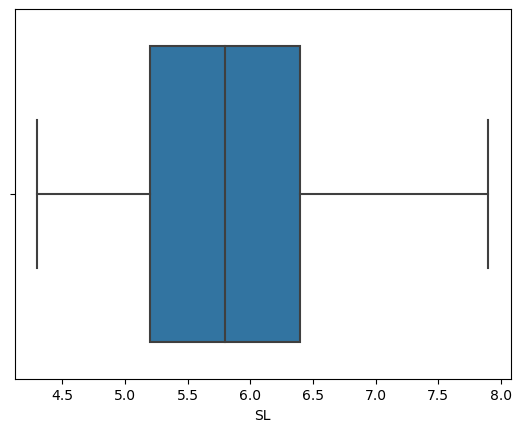

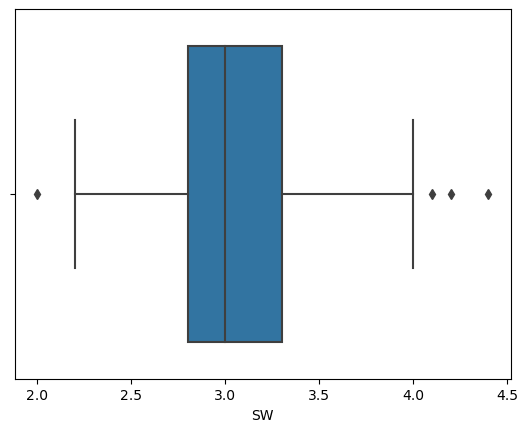

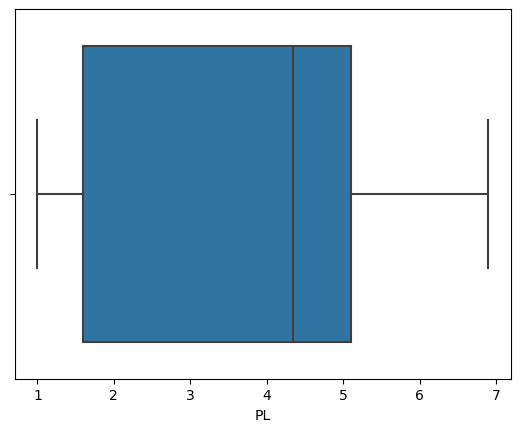

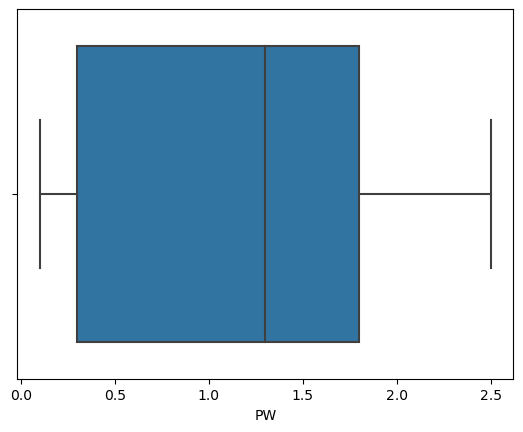

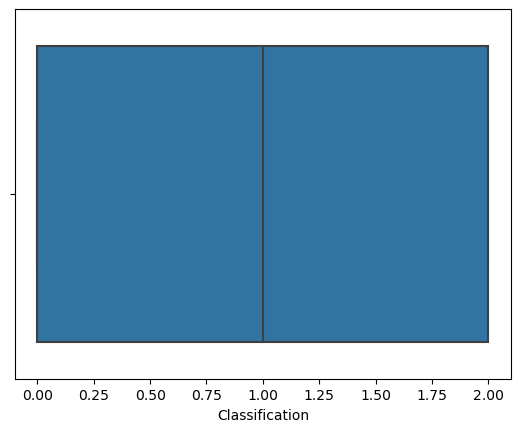

In [26]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# Removing Outliers

In [27]:
IQR=stats.iqr(data.SW,interpolation='midpoint')
IQR

0.5

In [28]:
Q1=data.SW.quantile(0.25)
Q3=data.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.05, 4.05)

In [29]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [30]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [31]:
data.loc[data['SW']>max_limit,'SW']=np.median(data.SW)

In [32]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


In [33]:
data.loc[data['SW']<min_limit,'SW']=np.median(data.SW)

In [34]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification


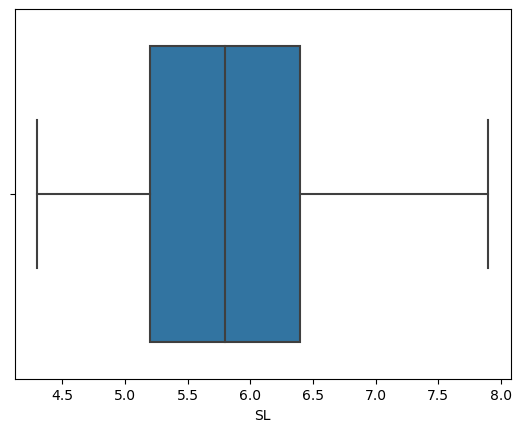

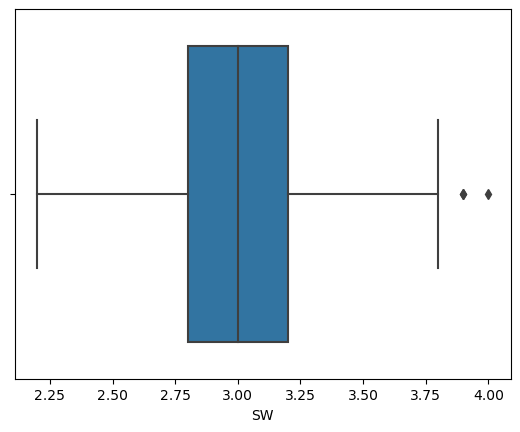

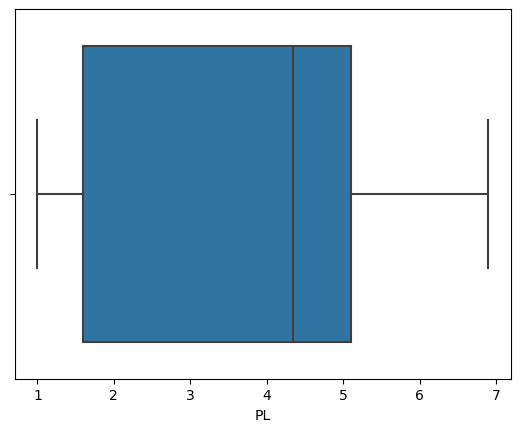

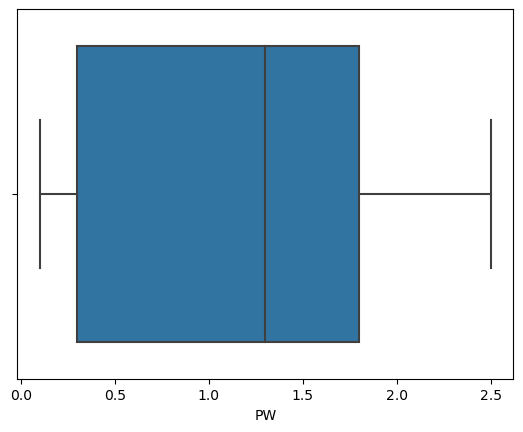

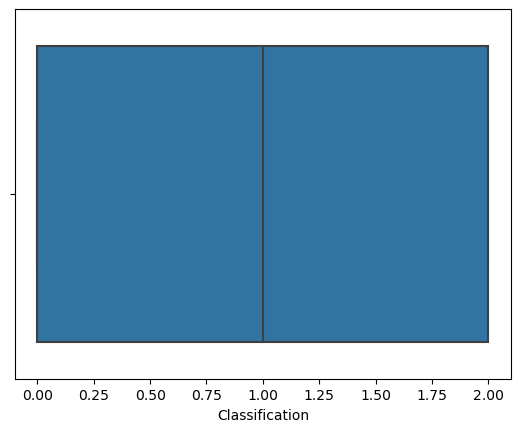

In [35]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# Frequency graph

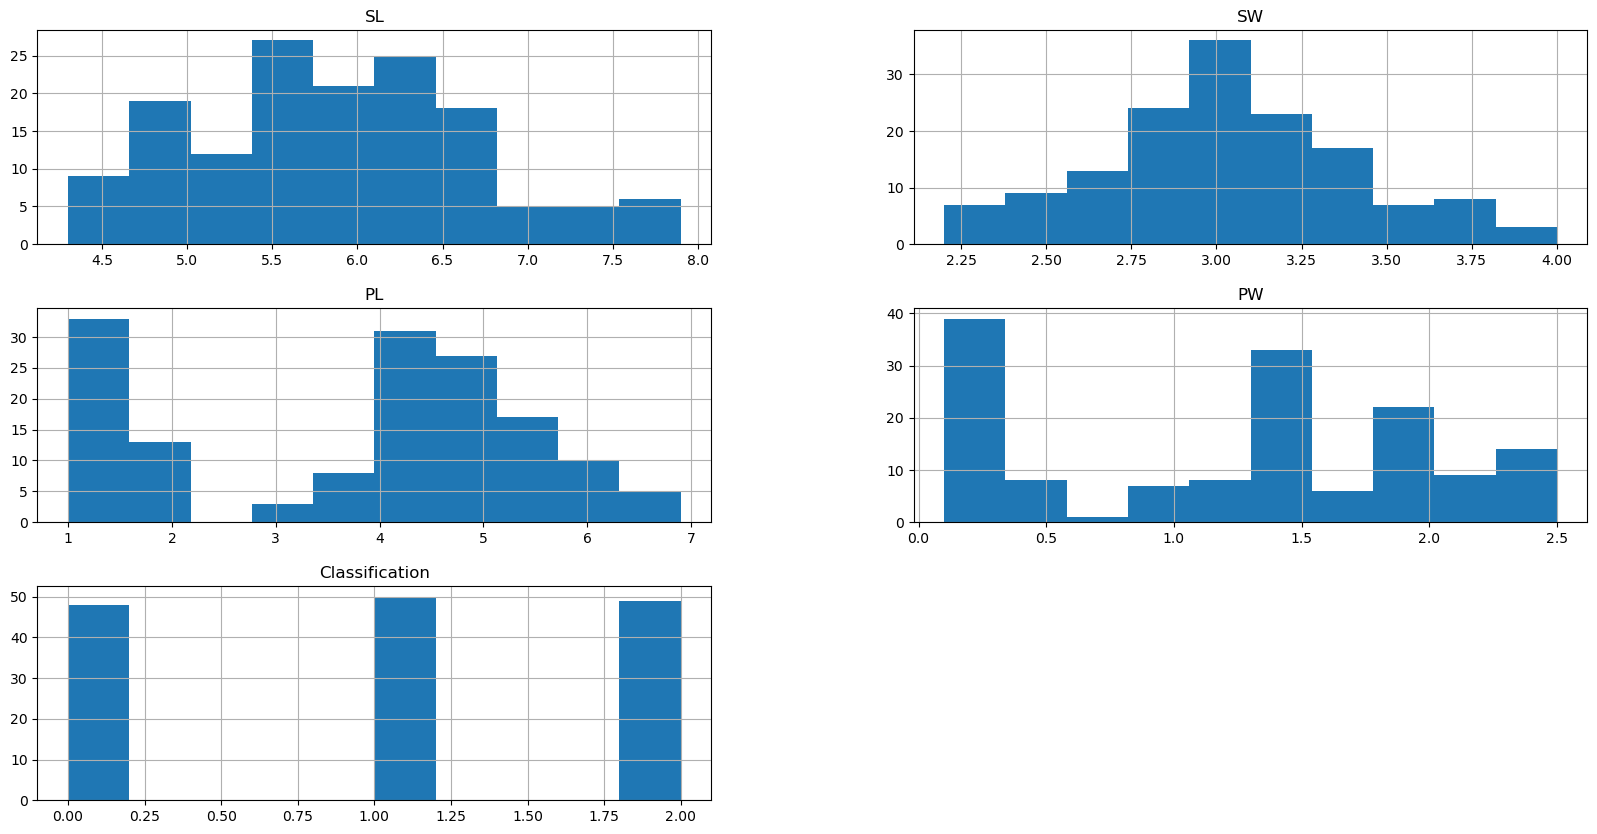

In [36]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,10))
plt.show()

# Correlation matrix 

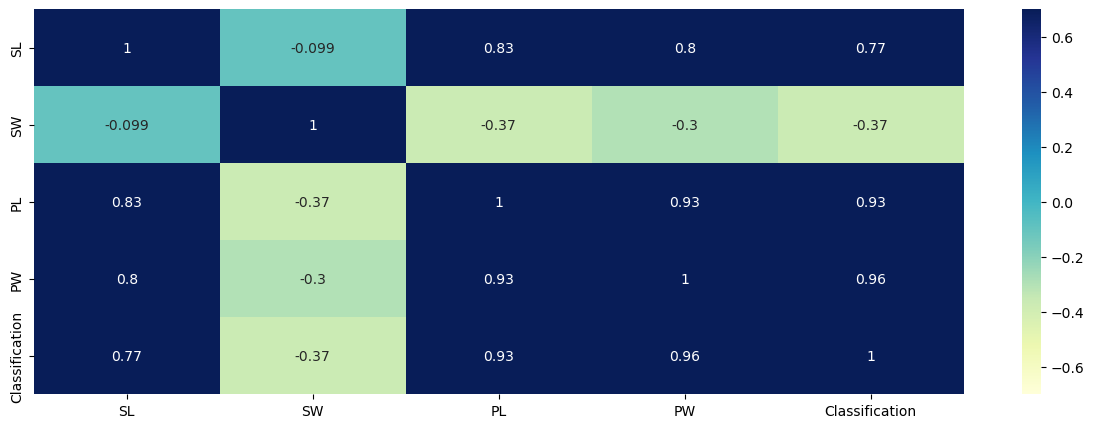

In [37]:
corr_matrix=data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corr_matrix,annot=True,vmax=0.7,vmin=-0.7,cmap='YlGnBu')
plt.show()

In [38]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [39]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [41]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# Training and testing

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.fit_transform(x_test)

In [44]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='lbfgs',max_iter=400)
model=clf.fit(x_train,y_train)

In [45]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [46]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
print("Accuracy score =",accuracy_score(y_test,y_pred))
print("Precision score =",precision_score(y_test,y_pred,average='micro'))
print("Recall score =",recall_score(y_test,y_pred,average='micro'))
print("F1 score =",f1_score(y_test,y_pred,average='micro'))

Accuracy score = 0.9333333333333333
Precision score = 0.9333333333333333
Recall score = 0.9333333333333333
F1 score = 0.9333333333333333


# kNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors=np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [48]:
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

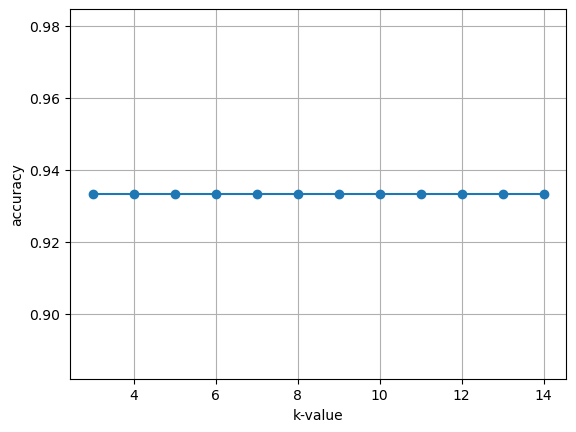

In [49]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.grid()

In [50]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [51]:
print("Accuracy score =",accuracy_score(y_test,y_pred))
print("Precision score =",precision_score(y_test,y_pred,average='micro'))
print("Recall score =",recall_score(y_test,y_pred,average='micro'))
print("F1 score =",f1_score(y_test,y_pred,average='micro'))

Accuracy score = 0.9333333333333333
Precision score = 0.9333333333333333
Recall score = 0.9333333333333333
F1 score = 0.9333333333333333


# SVM

In [52]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
y_pred_svm=svmclf.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
print("Accuracy score=",accuracy_score(y_test,y_pred_svm))

Accuracy score= 0.9666666666666667


In [56]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [57]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [58]:
y_pred_svm=svmclf.predict(x_test)

In [59]:
print("Accuracy score=",accuracy_score(y_test,y_pred_svm))

Accuracy score= 0.9333333333333333


In [60]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


In [61]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [62]:
y_pred_svm=svmclf.predict(x_test)

In [63]:
print("Accuracy score=",accuracy_score(y_test,y_pred_svm))

Accuracy score= 0.9


In [64]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  9  1]
 [ 0  2  7]]


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
y_pred_dt=dt_clf.predict(x_test)

In [67]:
print("Accuracy score=",accuracy_score(y_test,y_pred_dt))

Accuracy score= 0.9333333333333333


In [68]:
print(confusion_matrix(y_test,y_pred_dt))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred_rf=rf_clf.predict(x_test)

In [71]:
print("Accuracy score=",accuracy_score(y_test,y_pred_rf))

Accuracy score= 0.9333333333333333


In [72]:
print(confusion_matrix(y_test,y_pred_rf))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# Decision tree is the best classification model with accuracy score = 1.0, followed by random forest accuracy=0.96